## Algemeen, data inladen

In [30]:
import pandas as pd
import datetime
from configparser import ConfigParser
import json, requests


pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', 500)
PANDAS_FILE = '../simplicate_cache/hours.pd'
df = pd.read_pickle(PANDAS_FILE)

pd.options.display.float_format = '{:,.1f}'.format
df['turnover'] = df.apply(lambda a: (a['hours']+a['corrections']) * (a['tariff'] if a['tariff'] > 0 else a['service_tariff']), axis=1)
df['turnover'] = df.apply(lambda a: a['turnover']/2 if a['project_number'] == 'TOR-3' else a['turnover'], axis=1)
df['week'] = df.apply(lambda a: datetime.datetime.strptime(a['day'],'%Y-%m-%d').isocalendar()[1], axis=1)
df[-20:]

,employee,organization,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
4877,Wouter Gerrits,Oberon,Internal,OBE-1,Finance,normal,0.0,Internal,False,0.0,0.5,2021-02-17,to_forward,0.0,0.0,7
4878,Wouter Gerrits,Sprout Money BV,CopyCoin M&S 2021,SLIM-30,Maintenance and Support 2021,normal,110.0,Maintenance & Support,False,85.0,1.5,2021-02-17,to_forward,0.0,127.5,7
4879,Fadhlur Zahri,Functionals,Functionals - SLA,FUNC-1,Service Basic,normal,110.0,Service basic laag,True,110.0,0.5,2021-02-17,to_forward,0.0,55.0,7
4880,Wouter Gerrits,Oberon,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,0.8,2021-02-17,to_forward,0.0,0.0,7
4881,Marijn Hurkens,Sprout Money BV,Value Jagers Agile,VJ2021,Value Jagers - Februari 2020,normal,95.0,Back-end Development,True,95.0,0.2,2021-02-17,forwarded,0.0,23.8,7
4882,Sho Stegmeijer,Qikker Online B.V.,Verzuim / Sick leave,,Standaard dienstverlening,absence,0.0,Ziek / Sick,False,0.0,8.0,2021-02-18,projectmanager_approved,0.0,0.0,7
4883,Hans-Peter Harmsen,Oberon,Internal,OBE-1,Sales,normal,0.0,Miscellaneous,False,0.0,2.0,2021-02-18,to_forward,0.0,0.0,7
4884,Hans-Peter Harmsen,Oberon,Internal,OBE-1,HRM,normal,0.0,Internal,False,0.0,0.5,2021-02-18,to_forward,0.0,0.0,7
4885,Hans-Peter Harmsen,Oberon,Internal,OBE-1,MT,normal,0.0,Internal,False,0.0,0.2,2021-02-18,to_forward,0.0,0.0,7
4886,Hans-Peter Harmsen,Oberon,Internal,OBE-1,Sales,normal,0.0,Accounts,False,0.0,0.2,2021-02-18,to_forward,0.0,0.0,7


## Focus op gewerkte uren, laat vrij/ziek eruit

In [31]:
# type can be 'normal', 'absence' or 'leave'
worked = df.query( 'type=="normal" ')
worked.describe()

,service_tariff,tariff,hours,corrections,turnover,week
count,"4,805.0","4,805.0","4,805.0","4,805.0","4,805.0","4,805.0"
mean,40.0,38.0,2.0,-0.1,87.5,3.8
std,48.6,97.6,2.3,0.7,208.8,2.5
min,0.0,0.0,0.0,-8.0,-0.0,1.0
25%,0.0,0.0,0.5,0.0,0.0,2.0
50%,0.0,0.0,1.0,0.0,0.0,4.0
75%,95.0,85.0,3.0,0.0,63.8,5.0
max,140.0,"6,000.0",11.0,0.2,"6,000.0",53.0


## Overzicht per dag/week

In [32]:
worked.groupby(['week','day'])[['hours','turnover']].sum()

hours  turnover
week day                        
1    2021-01-04  305.2   3,600.0
     2021-01-05  336.2  15,425.2
     2021-01-06  294.2  15,682.0
     2021-01-07  299.2  14,316.0
     2021-01-08  241.8  13,297.8
     2021-01-09    0.2       0.0
     2021-01-10    4.2      42.5
2    2021-01-11  341.0  13,047.1
     2021-01-12  343.0  15,198.7
     2021-01-13  304.5  16,985.1
     2021-01-14  345.8  15,249.1
     2021-01-15  244.2  11,438.1
     2021-01-16    1.0       0.0
     2021-01-17    3.0       0.0
3    2021-01-18  314.5   2,455.8
     2021-01-19  337.0  16,114.0
     2021-01-20  305.8  15,029.3
     2021-01-21  313.8  14,211.8
     2021-01-22  280.8  13,319.5
     2021-01-23    0.0       0.0
     2021-01-24    1.8       0.0
4    2021-01-25  310.8  10,480.4
     2021-01-26  340.0  14,804.5
     2021-01-27  302.2  16,955.2
     2021-01-28  311.2  15,401.0
     2021-01-29  248.8   9,172.9
     2021-01-30    4.5     110.0
     2021-01-31    8.0       0.0
5    2021-02-01  327.5   1,766.7
     2021-02-02  340.2  15,072.8
     2021-02-03  306.8  14,630.9
     2021-02-04  333.2  14,396.1
     2021-02-05  269.8  12,977.3
     2021-02-06    0.2       0.0
     2021-02-07    1.0       0.0
6    2021-02-08  301.0  14,108.4
     2021-02-09  333.3  17,704.3
     2021-02-10  275.5  15,359.7
     2021-02-11  315.5  23,401.0
     2021-02-12  208.0  10,119.2
     2021-02-13    2.0      71.2
     2021-02-14    8.0       0.0
7    2021-02-15  176.0     350.6
     2021-02-16  182.8   9,341.9
     2021-02-17  134.5   7,095.9
     2021-02-18   27.2   1,443.8
53   2021-01-01    0.0       0.0
     2021-01-02    2.0      42.5
     2021-01-03    2.5       0.0

In [33]:
worked.groupby(['week'])[['hours','turnover']].sum()

,hours,turnover
week,,
1,"1,481.3","62,363.4"
2,"1,582.5","71,918.2"
3,"1,553.5","61,130.5"
4,"1,525.5","66,923.9"
5,"1,578.8","58,843.8"
6,"1,443.3","80,763.9"
7,520.5,"18,232.2"
53,4.5,42.5


## Per persoon

In [34]:
teamview = pd.DataFrame( worked )
team = sorted([str(t) for t in teamview.employee.unique()])
for t in team:
    teamview[t] = teamview.apply(lambda a: a['turnover'] if a['employee'] == t else 0, axis=1)
cols= ['hours','turnover'] + team
pppw = teamview.groupby(['week'])[cols].sum().query('turnover > 0').T
pppw = pppw.drop( ['hours','turnover','Freelancer','Hans-Peter Harmsen', 'Gert Braun', 'Richard de Boer', 
                   'Joost Cornelissen', 'Jasper Bok', 'Mel Schuurman', 'Martijn van Klaveren', 
                   'Angela Duijs', 'Lunah Smits','Michiel Willekens', 'Wouter Gerrits'])
pppw.loc['mean'] = pppw.mean()
cols = ['week'+str(col) for col in pppw.columns]
pppw.columns = cols
maxVal = 3000
for col in cols:
    pppw[col] = pppw[col].where(pppw[col] < maxVal, maxVal)
pppw

,week1,week2,week3,week4,week5,week6,week7,week53
Bas Colenbrander,680.0,"1,320.0","1,340.0","2,315.0",170.0,"1,077.5",40.0,0.0
Caspar Geerlings,435.0,"1,159.5","1,030.0",511.8,"1,069.5",972.2,122.5,0.0
Chris Neven,"2,125.0","3,000.0",793.8,42.5,637.2,813.8,322.3,0.0
Eva Korteweg,942.5,800.9,"1,331.6",587.5,411.4,508.9,0.0,0.0
Fadhlur Zahri,"1,064.2",492.7,778.5,"1,787.5","1,536.5","1,978.3",480.0,0.0
Filipe José Mariano dos Santos,"2,720.0","2,310.0","2,380.0","2,720.0","2,550.0","3,000.0",0.0,0.0
Geert-Jan van Mastrigt,"2,115.0","2,040.0","1,848.8","1,912.5","1,275.0","2,152.5",765.0,0.0
George Tsimenis,"3,000.0","3,000.0","3,000.0","2,970.0",440.0,"3,000.0","1,100.0",0.0
Gerben van Dijk,"2,345.0","2,681.2","2,566.2","1,573.8","1,987.5","3,000.0",0.0,0.0
Gijs Kattenberg,"3,000.0","2,750.0","2,532.5","2,395.0","2,387.5","1,901.0",0.0,0.0


In [35]:
[str(col) for col in pppw.columns]

['week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7', 'week53']

In [36]:
!pip install matplotlib

In [37]:
%matplotlib inline


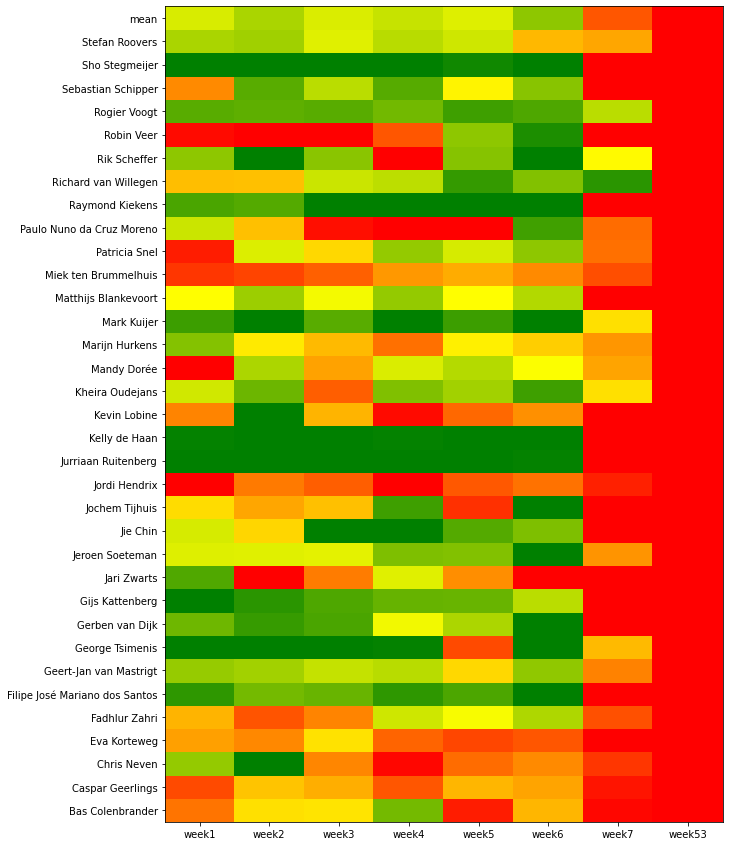

In [38]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['figure.figsize'] = [10, 15]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.pcolor(pppw, cmap=cmap)
plt.yticks(np.arange(0.5, len(pppw.index), 1), pppw.index)
plt.xticks(np.arange(0.5, len(pppw.columns), 1), pppw.columns)
#plt.set_size(500,800)
plt.show()

## Specifics
### Werk door een medewerker in een week

In [39]:
def person_week( employee, week ):
    filtered = df.query( f'employee == "{employee}" and week=={week}' )
    print( filtered.groupby(['week','day','project_name'])[['hours','corrections','turnover']].sum())
    totals = filtered[['hours','corrections','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[2])}')    
    
    
person_week( 'Jordi Hendrix', 2)    

                              hours  corrections  turnover
week day        project_name                              
2    2021-01-11 Internal        1.0          0.0       0.0
                TOR 3.0         7.0          0.0     166.2
     2021-01-12 Internal        0.0          0.0       0.0
                TOR 3.0         8.0          0.0     190.0
     2021-01-14 TOR 3.0         8.0          0.0     190.0
     2021-01-15 Internal        0.5          0.0       0.0
                TOR 3.0         7.5          0.0     178.1
Totals 32, €724


In [40]:
df.query( f'employee ==  "Jordi Hendrix" and week==2' )

,employee,organization,project_name,project_number,service,type,service_tariff,label,billable,tariff,hours,day,status,corrections,turnover,week
741,Jordi Hendrix,Oberon,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,1.0,2021-01-11,projectmanager_approved,0.0,0.0,2
742,Jordi Hendrix,TOR groep,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,7.0,2021-01-11,projectmanager_approved,0.0,166.2,2
908,Jordi Hendrix,Oberon,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.0,2021-01-12,forwarded,0.0,0.0,2
909,Jordi Hendrix,TOR groep,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,8.0,2021-01-12,projectmanager_approved,0.0,190.0,2
1229,Jordi Hendrix,TOR groep,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,8.0,2021-01-14,projectmanager_approved,0.0,190.0,2
1382,Jordi Hendrix,TOR groep,TOR 3.0,TOR-3,Development Sprints Q1,normal,47.5,Back-end Development,False,47.5,7.5,2021-01-15,projectmanager_approved,0.0,178.1,2
1383,Jordi Hendrix,Oberon,Internal,OBE-1,Other / Unaccountable,normal,0.0,Internal,False,0.0,0.0,2021-01-15,forwarded,0.0,0.0,2
1384,Jordi Hendrix,Oberon,Internal,OBE-1,ObSessions - Improve Oberon,normal,0.0,Internal,False,0.0,0.5,2021-01-15,projectmanager_approved,0.0,0.0,2


In [41]:
person_week( 'Filipe José Mariano dos Santos', 4)

                                   hours  corrections  turnover
week day        project_name                                   
4    2021-01-25 CopyCoin M&S 2021    7.0          0.0     595.0
                Internal             1.0          0.0       0.0
     2021-01-26 CopyCoin M&S 2021    2.5          0.0     212.5
                Internal             5.5          0.0       0.0
     2021-01-27 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-28 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
     2021-01-29 CopyCoin M&S 2021    7.5          0.0     637.5
                Internal             0.5          0.0       0.0
Totals 40, €2720


In [42]:
person_week( 'Jordi Hendrix', 4)

                              hours  corrections  turnover
week day        project_name                              
4    2021-01-25 Internal        1.0          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-26 Internal        0.5          0.0       0.0
                TOR 3.0         7.8         -7.8       0.0
     2021-01-28 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
     2021-01-29 Internal        0.5          0.0       0.0
                TOR 3.0         7.0         -7.0       0.0
Totals 31, €0


### Werk aan een specifiek project in eenweek

In [43]:
def project_week( project, week ):
    filtered = df.query( f'project_number == "{project}" and week=={week}' )
    print( filtered.groupby(['week','day','employee'])[['hours','turnover']].sum())
    totals = filtered[['hours','turnover']].sum()
    print( f'Totals {int(totals[0])}, €{int(totals[1])}')    
    
project_week( 'TOR-3', 4)


                                      hours  turnover
week day        employee                             
4    2021-01-25 Chris Neven             7.5      42.5
                Eva Korteweg            3.0       0.0
                Jordi Hendrix           7.0       0.0
                Kevin Lobine            7.2      -0.0
                Mandy Dorée             2.2       0.0
                Marijn Hurkens          7.5      -0.0
                Richard de Boer         1.0      27.5
     2021-01-26 Chris Neven             8.0       0.0
                Eva Korteweg            2.5      -0.0
                Jordi Hendrix           7.8       0.0
                Kevin Lobine            8.0       0.0
                Mandy Dorée             1.5       0.0
                Marijn Hurkens          7.5      -0.0
                Richard de Boer         2.0       0.0
                Richard van Willegen    2.5      -0.0
     2021-01-27 Chris Neven             8.5      -0.0
                Kevin Lobine

## Productiviteit

In [44]:

def percentages(working):
    tot_hours = working['hours'].sum()
    print( 'tot hours', tot_hours)
    
    client_hours = working.query('organization not in ("Oberon", "Qikker Online B.V.")')['hours'].sum()
    print( 'client hours', client_hours)
    
    
    billable_hours = working.query('tariff > 0 or service_tariff>0')['hours'].sum()+working.query('tariff > 0 or service_tariff>0')['corrections'].sum()
    print( 'billiable hours', billable_hours)
    
    productivity = round( client_hours / tot_hours * 100,0)
    print( f'productief {productivity:.0f}%' )
    
    billable = round( billable_hours / tot_hours * 100,0)
    print( f'billable {billable:.0f}%' )


### Productiviteit van iedereen

In [45]:
working = df.query('type=="normal"')
percentages( working )

tot hours 9689.9
client hours 5530.833333333333
billiable hours 4920.000000000034
productief 57%
billable 51%


### Productiviteit productiemensen

In [46]:
production_users = ['Gerben van Dijk', 'Sebastian Schipper', 'Filipe José Mariano dos Santos', 'Geert-Jan van Mastrigt', 'George Tsimenis', 'Marijn Hurkens', 'Kevin Lobine', 'Stefan Roovers', 'Bas Colenbrander', 'Caspar Geerlings', 'Jie Chin', 'Chris Neven', 'Fadhlur Zahri', 'Gijs Kattenberg', 'Jari Zwarts', 'Jasper Bok', 'Jeroen Soeteman', 'Jochem Tijhuis', 'Jordi Hendrix', 'Jurriaan Ruitenberg', 'Mark Kuijer', 'Matthijs Blankevoort', 'Paulo Nuno da Cruz Moreno', 'Raymond Kiekens', 'Richard van Willegen', 'Rik Scheffer', 'Robin Veer', 'Rogier Voogt', 'Sho Stegmeijer', 'Patricia Snel', 'Eva Korteweg', 'Kelly de Haan', 'Kheira Oudejans', 'Mandy Dorée', 'Miek ten Brummelhuis']
working = df.query(f'type=="normal" and employee in {production_users}')
percentages( working )

tot hours 7523.5
client hours 5302.083333333334
billiable hours 4713.500000000034
productief 70%
billable 63%


## Productivteit per persoon

In [47]:
for user in production_users:
    working = df.query(f'type=="normal" and employee == "{user}"')
    print( user )
    percentages( working )
    print()

Gerben van Dijk
tot hours 238.0
client hours 164.5
billiable hours 159.0
productief 69%
billable 67%

Sebastian Schipper
tot hours 216.0
client hours 129.75
billiable hours 129.75
productief 60%
billable 60%

Filipe José Mariano dos Santos
tot hours 232.0
client hours 200.0
billiable hours 185.0
productief 86%
billable 80%

Geert-Jan van Mastrigt
tot hours 145.0
client hours 140.25
billiable hours 140.25
productief 97%
billable 97%

George Tsimenis
tot hours 280.75
client hours 172.25
billiable hours 172.25
productief 61%
billable 61%

Marijn Hurkens
tot hours 249.75
client hours 212.75
billiable hours 183.0
productief 85%
billable 73%

Kevin Lobine
tot hours 240.0
client hours 184.0
billiable hours 151.25
productief 77%
billable 63%

Stefan Roovers
tot hours 213.25
client hours 135.25
billiable hours 135.25
productief 63%
billable 63%

Bas Colenbrander
tot hours 245.75
client hours 84.25
billiable hours 83.75
productief 34%
billable 34%

Caspar Geerlings
tot hours 229.5
client hours 5

## Interne uren

In [48]:
working.query('tariff == 0 and service_tariff==0').groupby(['project_name','service'])['hours'].sum()

project_name  service                      
Internal      Finance                          0.8
              ObSessions - Improve Oberon     25.2
              ObSessions - Improve yourself    4.5
              Office                           2.5
              Operations                      23.0
              Other / Unaccountable           14.0
              Recruitment                      0.8
              Sales                            2.0
              Teambuilding                    13.8
Name: hours, dtype: float64

## Uren submitten

In [49]:
def post(url_path: str, post_fields: dict):
    headers = {
        'Authentication-Key': api_key,
        'Authentication-Secret': api_secret,
        'Content-type': 'application/json',
        'Accept': 'text/plain',
    }
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    print( 'POST', url, post_fields, headers)
    return requests.post(url, json=post_fields, headers=headers)


def get(url_path: str):
    url = f'https://{subdomain}.simplicate.nl/api/v2{url_path}'
    headers = {'Authentication-Key': api_key, 'Authentication-Secret': api_secret}
    response = requests.get(url, headers=headers, timeout=15)
    return response.json()['data']

In [50]:
print( get( '/hrm/employee?q[full_name]="Hans-Peter Harmsen"') )

NameError: name 'subdomain' is not defined

In [ ]:
employee_id = get( '/hrm/employee?q[name]=Hans-Peter Harmsen')[0]['id']
project_id = get('/projects/project?q[project_number]=OBE-1')[0]['id']
service_id = get(f'/projects/service?q[project_id]={project}&q[name]=Finance')[0]['id']
hourstype_id = get('/hours/hourstype?q[label]=Internal')[0]['id']

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d %H:%M:%S'),
  "note": "test vanuit Jupyter"
}
postdata

In [ ]:
postdata = {
  "employee_id": employee_id,
  "project_id": project_id,
  "projectservice_id": service_id,
  "type_id": hourstype_id,
  "amount": 1,
  "start_date": datetime.datetime.now().strftime( '%Y-%m-%d'),
  "note": "test vanuit Jupyter 2"
}
postdata

In [ ]:
res = post( '/hours/hours', post_fields = postdata)
res

In [ ]:
def find_bookable1( zoek):
    zoek = zoek.lower()
    projects = get('/projects/project?q[active]=True')
    projects = {p['id']:p['organization']['name']+ ' ' + p['name'] for p in projects}
    services = get(f'/projects/service?q[status]=open')

    res = []
    for s in services:
        if not s['project_id'] in projects.keys() or not s.get('name'):
            continue
        found_services = []
        for h in s.get('hour_types',[]):
            full_name = projects[s['project_id']] + ' ' + s['name'] + ' ' + h['hourstype']['label']
            full_name = full_name.replace( ' Internal ', ' ')
            if not full_name.lower().count(zoek):
                continue
            found_services += [full_name]
            print( s['id'] + ' ' + full_name)
            res += [( s['project_id'], s['id'], h['id'] )]
    if len(res) == 1:
        return res[0]
    if len(res) == 0:
        print( 'No service found')
    else:
        print( 'Multiple services found')
        for f in found_services:
            print( f )
    return None, None, None


In [ ]:
find_bookable1( 'int')

In [ ]:
services = get(f'/projects/service?q[status]=open')
ser

In [ ]:
projects = get('/projects/service?q[status]=open')
print( len( projects))

In [ ]:
projects = get('/projects/project?q[project_status.label]=active')
print( len( projects))